# Time Series Forecasting for Portfolio Management Optimization 

## Overview
This project provides a comprehensive solution for Time Series Forecasting for Portfolio Management Optimization. The goal of this project is to leverage time series forecasting models, including ARIMA, SARIMA, and LSTM, to predict market trends, optimize asset allocation, and enhance portfolio performance at Guide Me in Finance (GMF) Investments. This project uses real-time financial data sourced from YFinance to guide investment strategies and improve risk management.

## Business Need
As a Financial Analyst at GMF Investments, our objective is to apply time series forecasting to historical financial data to enhance portfolio management strategies. our role involves analyzing data, building predictive models, and recommending portfolio adjustments based on forecasted trends.

## Objective
The objective of this challenge is to develop time series forecasting models for financial data, evaluate their performance, and apply them to optimize an investment portfolio. Key tasks include:

1. Data Preprocessing & Exploration: Clean and prepare historical financial data from assets like Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).
2. Time Series Forecasting: Implement ARIMA, SARIMA, and LSTM models to predict future stock prices.
3. Portfolio Optimization: Use forecasted data to optimize a portfolio by adjusting asset allocations to maximize returns while minimizing risk.

# 1. Data Collection

### Import Necessary Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

### Load dataset

In [23]:
tsla_data = pd.read_csv("../data/cleaned_tsla_data.csv")
tsla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [24]:
bnd_data = pd.read_csv("../data/cleaned_bnd_data.csv")
bnd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [25]:
spy_data = pd.read_csv("../data/cleaned_spy_data.csv")
spy_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,63.358749,82.650002,82.690002,82.419998,82.430000,2218800
1,2015-01-05 00:00:00+00:00,63.542755,82.889999,82.919998,82.699997,82.739998,5820100
2,2015-01-06 00:00:00+00:00,63.726723,83.129997,83.379997,83.029999,83.029999,3887600
3,2015-01-07 00:00:00+00:00,63.765026,83.180000,83.279999,83.050003,83.139999,2433400
4,2015-01-08 00:00:00+00:00,63.665375,83.050003,83.110001,82.970001,83.110001,1873400


## 2. Data Preprocessing

### 2.1 Data cleaning and Understanding

#### Check basic statistics

In [26]:
# Check basic statistics
spy_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,70.089251,80.316039,80.431152,80.198464,80.319968,4.169014e+06
std,4.889919,5.097592,5.082268,5.113232,5.100419,2.778389e+06
min,62.637562,68.040001,68.379997,67.989998,68.080002,0.000000e+00
25%,66.314068,76.379997,76.674999,76.265001,76.502501,2.024900e+06
50%,68.888943,81.410004,81.519997,81.300003,81.410004,3.710900e+06
75%,73.807495,84.010002,84.167500,83.937502,84.047503,5.519825e+06
max,79.812943,89.480003,89.589996,89.440002,89.550003,3.193720e+07


In [27]:
bnd_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [28]:
tsla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


#### Ensure appropriate data types

In [29]:
# Ensure appropriate data types
print("SPY dataset\n", spy_data.dtypes)
print("BND dataset\n", bnd_data.dtypes)
print("TESLA dataset\n", tsla_data.dtypes)

SPY dataset
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
BND dataset
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
TESLA dataset
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


#### Cheking missing values

In [30]:
# Check for missing values
print(spy_data.isnull().sum())
print(bnd_data.isnull().sum())
print(tsla_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### Normalize and scale the data

In [31]:
# Normalize or scale the data if needed (using MinMaxScaler for example)
scaler = MinMaxScaler()
spy_data_scaled = pd.DataFrame(scaler.fit_transform(spy_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]), columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
bnd_data_scaled = pd.DataFrame(scaler.fit_transform(bnd_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]), columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
tsla_data_scaled = pd.DataFrame(scaler.fit_transform(tsla_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]), columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Display the cleaned data
print(spy_data_scaled.head())
print(bnd_data_scaled.head())
print(tsla_data_scaled.head())

       Open      High       Low     Close  Adj Close    Volume
0  0.041990  0.681437  0.674682  0.672727   0.668374  0.069474
1  0.052703  0.692630  0.685526  0.685781   0.682813  0.182236
2  0.063414  0.703824  0.707214  0.701165   0.696320  0.121726
3  0.065644  0.706157  0.702499  0.702098   0.701444  0.076193
4  0.059842  0.700093  0.694484  0.698368   0.700046  0.058659
       Open      High       Low     Close  Adj Close    Volume
0  0.012594  0.012594  0.011263  0.012148   0.013359  0.067348
1  0.011059  0.011059  0.010149  0.011122   0.011979  0.077377
2  0.011257  0.011257  0.009770  0.010626   0.011234  0.092210
3  0.011202  0.011202  0.009866  0.011563   0.011780  0.037529
4  0.011147  0.011147  0.009704  0.011602   0.011690  0.045400
       Open      High       Low     Close  Adj Close    Volume
0  0.012594  0.012594  0.011263  0.012148   0.013359  0.067348
1  0.011059  0.011059  0.010149  0.011122   0.011979  0.077377
2  0.011257  0.011257  0.009770  0.010626   0.011234  0

## 3. Explanatory Data Analysis

### Clossing Price Over a time

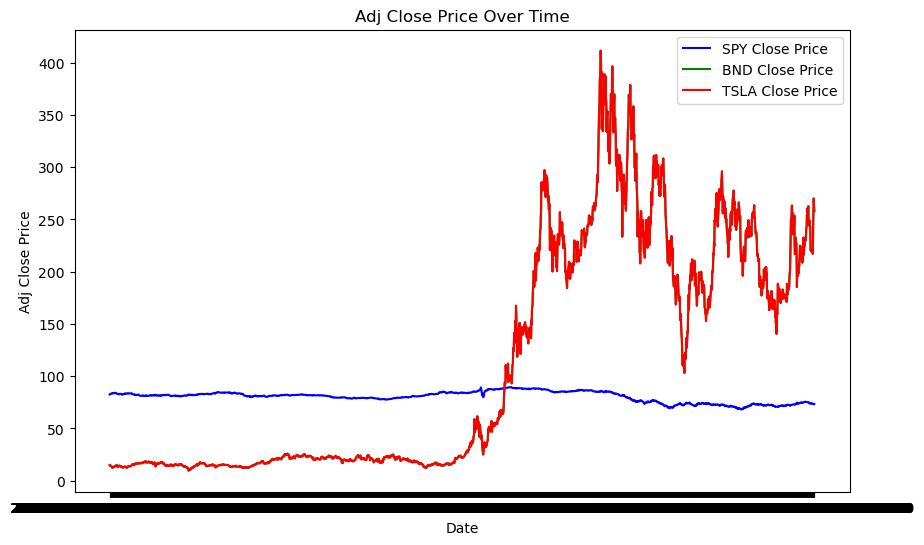

In [32]:
# Plotting closing price over time using Adj Close
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Adj Close'], label='SPY Close Price', color='blue')
plt.plot(bnd_data['Date'], bnd_data['Adj Close'], label='BND Close Price', color='green')
plt.plot(tsla_data['Date'], tsla_data['Adj Close'], label='TSLA Close Price', color='red')
plt.title('Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


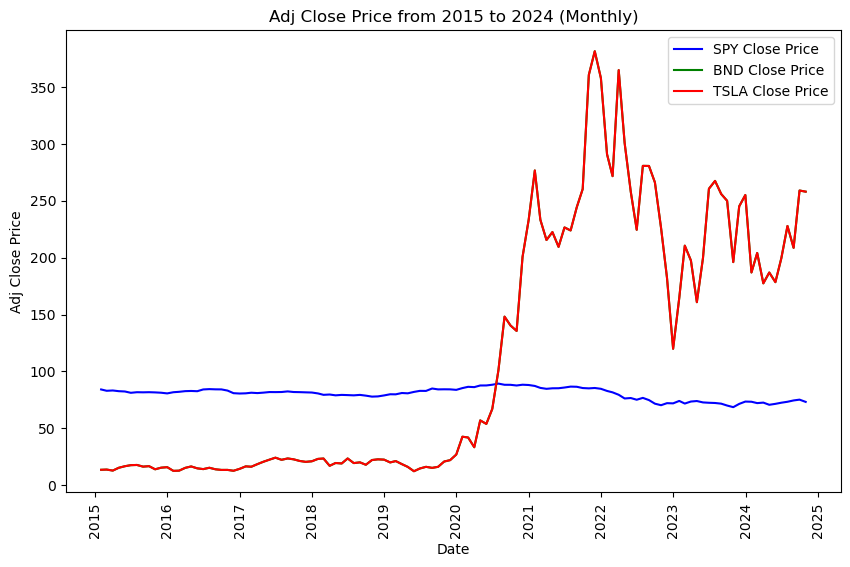

In [33]:
# Convert 'Date' column to datetime 
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
bnd_data['Date'] = pd.to_datetime(bnd_data['Date'])
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

# Resample the data to monthly frequency and take the last closing price of each month
spy_monthly = spy_data.resample('M', on='Date').last()
bnd_monthly = bnd_data.resample('M', on='Date').last()
tsla_monthly = tsla_data.resample('M', on='Date').last()

# plotting in each year with monthly data
def plot_monthly_closing_prices(data_list, labels, colors, start_year=2015, end_year=2024, interval=10):
    for start in range(start_year, end_year, interval):
        end = min(start + interval, end_year)
        plt.figure(figsize=(10, 6))
        
        for data, label, color in zip(data_list, labels, colors):
            # Filter data within the start and end year range
            data_range = data[(data.index >= f'{start}-01-01') & (data.index <= f'{end}-12-31')]
            plt.plot(data_range.index, data_range['Adj Close'], label=label, color=color)
        
        plt.title(f'Adj Close Price from {start} to {end} (Monthly)')
        plt.xlabel('Date')
        plt.ylabel('Adj Close Price')
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

# Call the function with resampled monthly data
plot_monthly_closing_prices([spy_monthly, bnd_monthly, tsla_monthly], 
                            ['SPY Close Price', 'BND Close Price', 'TSLA Close Price'], 
                            ['blue', 'green', 'red'])


### Plot the daily percentage change

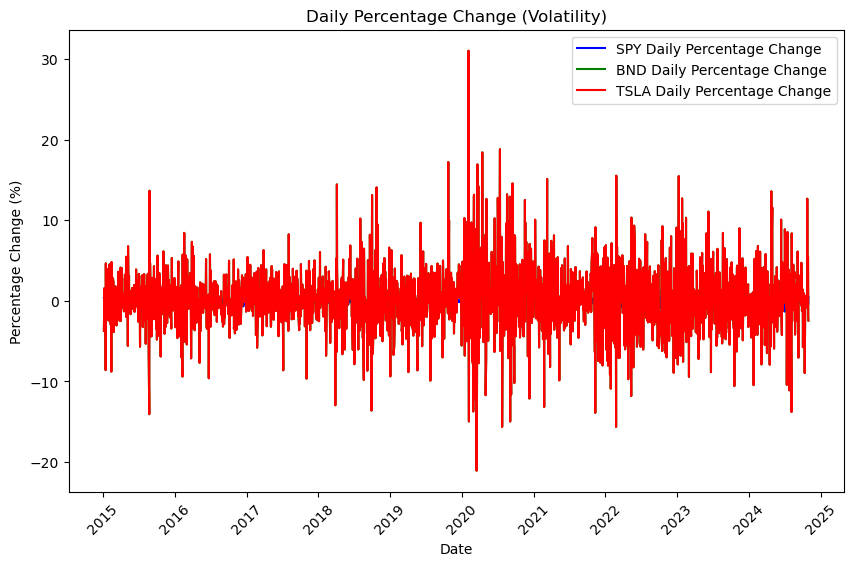

In [34]:
# Calculate and plot daily percentage change (volatility)
spy_data['Pct Change'] = spy_data['Adj Close'].pct_change() * 100
spy_data['Pct Change'] = spy_data['Adj Close'].pct_change() * 100
bnd_data['Pct Change'] = bnd_data['Adj Close'].pct_change() * 100
tsla_data['Pct Change'] = tsla_data['Adj Close'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(spy_data['Date'], spy_data['Pct Change'], label='SPY Daily Percentage Change', color='blue')
plt.plot(bnd_data['Date'], bnd_data['Pct Change'], label='BND Daily Percentage Change', color='green')
plt.plot(tsla_data['Date'], tsla_data['Pct Change'], label='TSLA Daily Percentage Change', color='red')
plt.title('Daily Percentage Change (Volatility)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Calculating rolling means and standard deviations

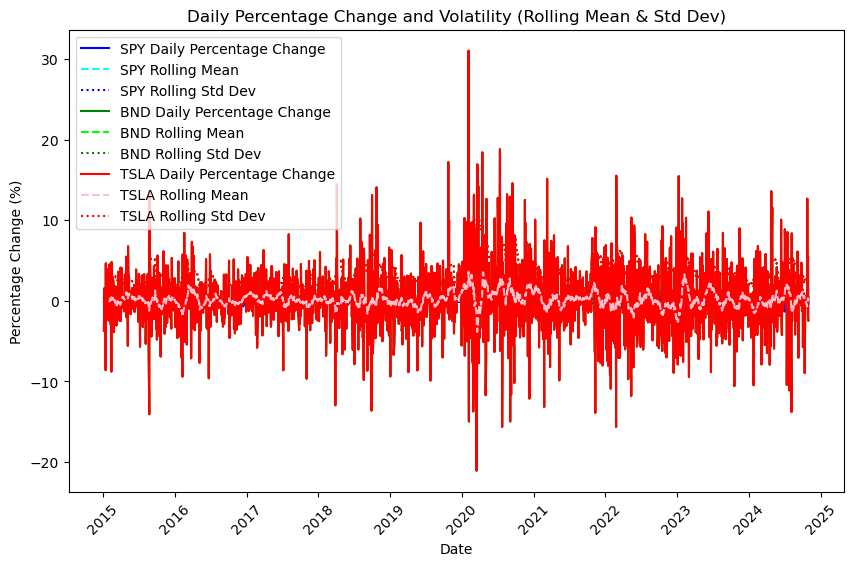

In [37]:
# Calculate rolling mean and standard deviation for volatility analysis
window_size = 21  # Rolling window size (e.g., 20 days)

spy_data['Rolling Mean'] = spy_data['Pct Change'].rolling(window=window_size).mean()
spy_data['Rolling Std'] = spy_data['Pct Change'].rolling(window=window_size).std()

bnd_data['Rolling Mean'] = bnd_data['Pct Change'].rolling(window=window_size).mean()
bnd_data['Rolling Std'] = bnd_data['Pct Change'].rolling(window=window_size).std()

tsla_data['Rolling Mean'] = tsla_data['Pct Change'].rolling(window=window_size).mean()
tsla_data['Rolling Std'] = tsla_data['Pct Change'].rolling(window=window_size).std()

# Plotting daily percentage change along with rolling mean and rolling standard deviation
plt.figure(figsize=(10, 6))

# SPY
plt.plot(spy_data['Date'], spy_data['Pct Change'], label='SPY Daily Percentage Change', color='blue')
plt.plot(spy_data['Date'], spy_data['Rolling Mean'], label='SPY Rolling Mean', color='cyan', linestyle='--')
plt.plot(spy_data['Date'], spy_data['Rolling Std'], label='SPY Rolling Std Dev', color='blue', linestyle=':')

# BND
plt.plot(bnd_data['Date'], bnd_data['Pct Change'], label='BND Daily Percentage Change', color='green')
plt.plot(bnd_data['Date'], bnd_data['Rolling Mean'], label='BND Rolling Mean', color='lime', linestyle='--')
plt.plot(bnd_data['Date'], bnd_data['Rolling Std'], label='BND Rolling Std Dev', color='green', linestyle=':')

# TSLA
plt.plot(tsla_data['Date'], tsla_data['Pct Change'], label='TSLA Daily Percentage Change', color='red')
plt.plot(tsla_data['Date'], tsla_data['Rolling Mean'], label='TSLA Rolling Mean', color='pink', linestyle='--')
plt.plot(tsla_data['Date'], tsla_data['Rolling Std'], label='TSLA Rolling Std Dev', color='red', linestyle=':')

plt.title('Daily Percentage Change and Volatility (Rolling Mean & Std Dev)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Outlier Detection

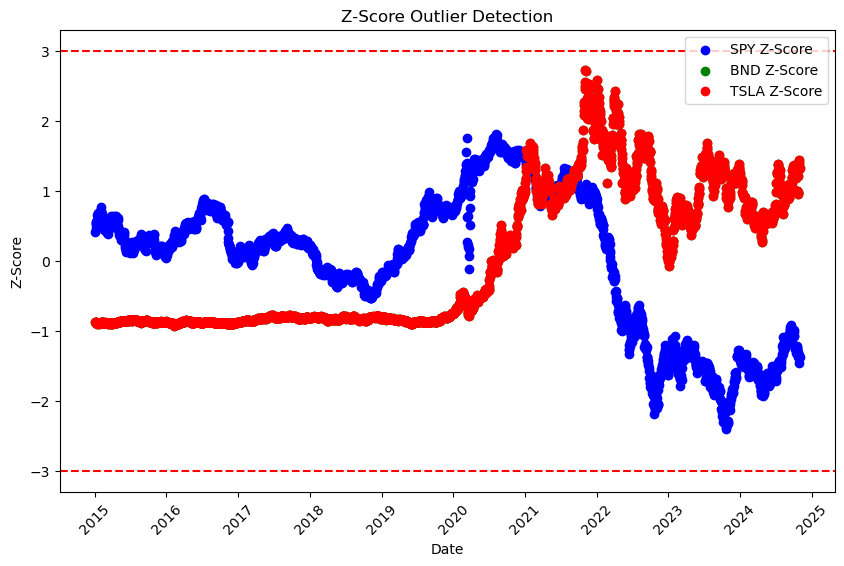

In [14]:
# Outlier detection using z-scores or boxplots
spy_data['Z-Score'] = zscore(spy_data['Adj Close'])
bnd_data['Z-Score'] = zscore(bnd_data['Adj Close'])
tsla_data['Z-Score'] = zscore(tsla_data['Adj Close'])

# Visualizing outliers with z-scores
plt.figure(figsize=(10, 6))
plt.scatter(spy_data['Date'], spy_data['Z-Score'], label='SPY Z-Score', color='blue')
plt.scatter(bnd_data['Date'], bnd_data['Z-Score'], label='BND Z-Score', color='green')
plt.scatter(tsla_data['Date'], tsla_data['Z-Score'], label='TSLA Z-Score', color='red')
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.title('Z-Score Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Analyze days with unusually high or low returns

In [ ]:
# We set a threshold for what constitutes "unusually high/low" returns (e.g., > 5% or < -5%)
threshold = -5
high_returns_spy = spy_data[spy_data['Pct Change'] > threshold]
low_returns_spy = spy_data[spy_data['Pct Change'] < -threshold]

high_returns_bnd = bnd_data[bnd_data['Pct Change'] > threshold]
low_returns_bnd = bnd_data[bnd_data['Pct Change'] < -threshold]

high_returns_tsla = tsla_data[tsla_data['Pct Change'] > threshold]
low_returns_tsla = tsla_data[tsla_data['Pct Change'] < -threshold]

print("High Returns (SPY):", high_returns_spy[['Date', 'Pct Change']])
print("Low Returns (SPY):", low_returns_spy[['Date', 'Pct Change']])

print("High Returns (BND):", high_returns_bnd[['Date', 'Pct Change']])
print("Low Returns (BND):", low_returns_bnd[['Date', 'Pct Change']])

print("High Returns (TSLA):", high_returns_tsla[['Date', 'Pct Change']])
print("Low Returns (TSLA):", low_returns_tsla[['Date', 'Pct Change']])

High Returns (SPY):                           Date  Pct Change
1    2015-01-05 00:00:00+00:00    0.376074
2    2015-01-06 00:00:00+00:00    0.350497
3    2015-01-07 00:00:00+00:00    0.132483
4    2015-01-08 00:00:00+00:00   -0.036082
5    2015-01-09 00:00:00+00:00   -0.120321
...                        ...         ...
2469 2024-10-24 00:00:00+00:00   -0.109054
2470 2024-10-25 00:00:00+00:00    0.272932
2471 2024-10-28 00:00:00+00:00   -0.326627
2472 2024-10-29 00:00:00+00:00   -0.464222
2473 2024-10-30 00:00:00+00:00    0.507538

[2473 rows x 2 columns]
Low Returns (SPY):                           Date  Pct Change
1    2015-01-05 00:00:00+00:00    0.376074
2    2015-01-06 00:00:00+00:00    0.350497
3    2015-01-07 00:00:00+00:00    0.132483
4    2015-01-08 00:00:00+00:00   -0.036082
5    2015-01-09 00:00:00+00:00   -0.120321
...                        ...         ...
2469 2024-10-24 00:00:00+00:00   -0.109054
2470 2024-10-25 00:00:00+00:00    0.272932
2471 2024-10-28 00:00:00+00:00   

## 4. Seasonality and Trends

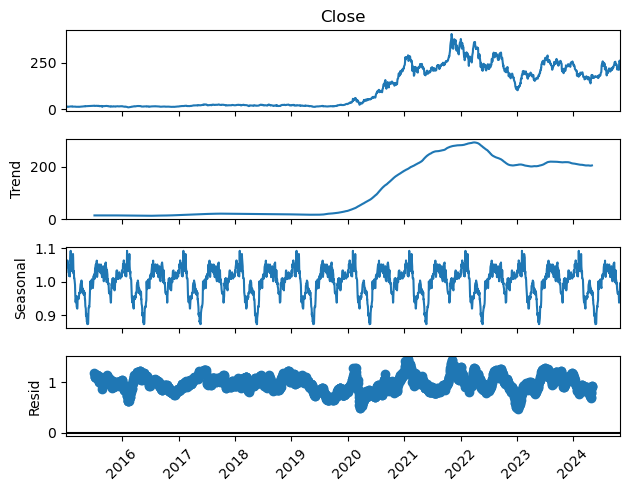

In [16]:
# Assuming tsla_data has already been cleaned and includes a 'Date' and 'Close' column
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
tsla_data.set_index('Date', inplace=True)

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(tsla_data['Close'], model='multiplicative', period=252)  # Assuming daily data and roughly 252 trading days per year
decomposition.plot()
plt.xticks(rotation=45)
plt.show()


## 4. Analyze Volatility

### Calculate rolling means and standard deviations

In [17]:
# Calculate rolling mean and standard deviation to understand volatility
tsla_data['Rolling Mean'] = tsla_data['Adj Close'].rolling(window=30).mean()
tsla_data['Rolling Std'] = tsla_data['Adj Close'].rolling(window=30).std()

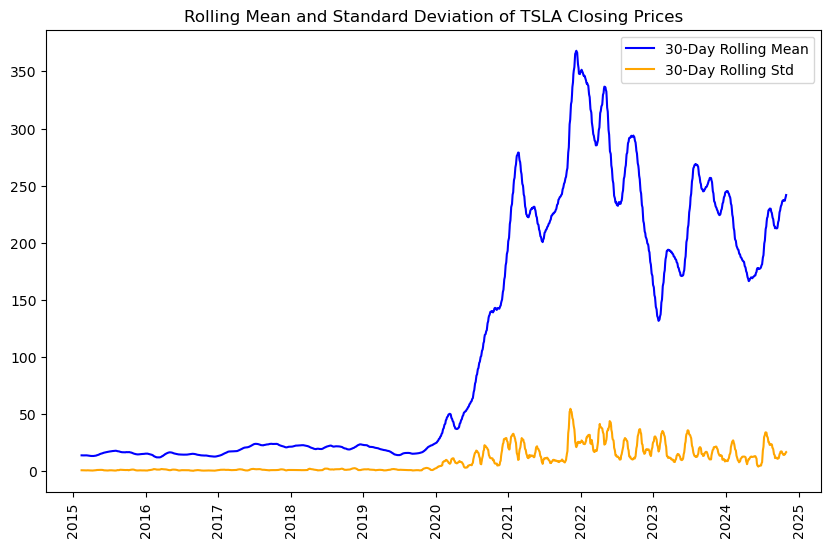

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tsla_data['Rolling Mean'], label='30-Day Rolling Mean', color='blue')
plt.plot(tsla_data['Rolling Std'], label='30-Day Rolling Std', color='orange')
plt.title('Rolling Mean and Standard Deviation of TSLA Closing Prices')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Calculate VaR ratio

In [19]:
# Calculate daily percentage change (returns) and volatility
tsla_data['Daily Return'] = tsla_data['Adj Close'].pct_change() * 100

# Value at Risk (VaR) - 1-day 99% confidence level (using historical simulation)
VaR = tsla_data['Daily Return'].quantile(0.01)
print(f"1-day Value at Risk (99% Confidence): {VaR}%")

1-day Value at Risk (99% Confidence): -9.883433717476606%


### Calculate Sharpe Ratio

In [20]:
# Sharpe Ratio (assuming risk-free rate = 0%)
mean_daily_return = tsla_data['Daily Return'].mean()
std_daily_return = tsla_data['Daily Return'].std()
sharpe_ratio = mean_daily_return / std_daily_return
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.04937686491246211
